# P7 : Classez et segmentez des données visuelles

## Importation des données

Upload si taille raisonable

In [4]:
# Upload du zip contenant les images
# from google.colab import files
# uploaded = files.upload()  

In [4]:
# data = zipfile.ZipFile(io.BytesIO(uploaded['images_2.zip']), 'r')
# data = zipfile.ZipFile(io.BytesIO(uploaded['Images_10.zip']), 'r')
# data.extractall(path=CT_DIR_DATA)


In [5]:
# data.printdir()
# data.infolist()

Download direct

In [0]:
# Nettoyage
import os
import shutil
shutil.rmtree('images', ignore_errors=True)

# Check
for path, dirs, files in os.walk('images'):
    if len(files) > 0: 
        print(path)
        break


In [0]:
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/'
import os
from six.moves.urllib.request import urlretrieve
def downloadfile(filename, targetloc='.', url=url):
    dest_filename = os.path.join(targetloc, filename)
    filename, _ = urlretrieve(url + filename, dest_filename)
    print(dest_filename, 'created')
    return filename

In [4]:
%%time
CT_FILE = 'images.tar'
f = downloadfile(CT_FILE)

import tarfile
tar = tarfile.open(CT_FILE)
tar.extractall(path='images')
# tar.extractall(path="")
tar.close()
# os.remove('images.tar')

./images.tar created
CPU times: user 6.62 s, sys: 7.17 s, total: 13.8 s
Wall time: 43 s


In [1]:
# Check
import os
CT_DIR_DATA = 'images'
nb_images = 0
nb_races = 0
races = []
for path, dirs, files in os.walk(CT_DIR_DATA):
    if len(files) > 0: 
        nb_races += 1
        f = path.split('/')[2]
        races.append((f.split('-')[0], f[f.find('-') + len('-'):]))

    for filename in files:
        nb_images += 1
print(nb_races, 'races')
print(nb_images, 'images')
print(races)

120 races
20580 images
[('n02108915', 'French_bulldog'), ('n02091032', 'Italian_greyhound'), ('n02099849', 'Chesapeake_Bay_retriever'), ('n02113186', 'Cardigan'), ('n02106382', 'Bouvier_des_Flandres'), ('n02104365', 'schipperke'), ('n02105056', 'groenendael'), ('n02105251', 'briard'), ('n02116738', 'African_hunting_dog'), ('n02100877', 'Irish_setter'), ('n02111277', 'Newfoundland'), ('n02091134', 'whippet'), ('n02112706', 'Brabancon_griffon'), ('n02093859', 'Kerry_blue_terrier'), ('n02108422', 'bull_mastiff'), ('n02100236', 'German_short-haired_pointer'), ('n02110627', 'affenpinscher'), ('n02113978', 'Mexican_hairless'), ('n02104029', 'kuvasz'), ('n02102177', 'Welsh_springer_spaniel'), ('n02112350', 'keeshond'), ('n02096051', 'Airedale'), ('n02089078', 'black-and-tan_coonhound'), ('n02095570', 'Lakeland_terrier'), ('n02094114', 'Norfolk_terrier'), ('n02098105', 'soft-coated_wheaten_terrier'), ('n02097298', 'Scotch_terrier'), ('n02093991', 'Irish_terrier'), ('n02105412', 'kelpie'), ('n0

## Classe de gestion des images

In [0]:
%matplotlib inline
import zipfile
import io
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

CT_DIR_DATA = 'images'

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

class MyImages:
    # Chargement des images du dossier CT_DIR_DATA
    def __init__(self, p_dir, p_nb_races):
        # Correspondance code/race
#         self.races = dict([(f.split('-')[0], f[f.find('-') + len('-'):]) for f in os.listdir(p_dir)])
        nb_races = 0
        self.races = []
#         for f in os.listdir(p_dir):
        for path, dirs, files in os.walk(p_dir):
            if len(files) == 0: 
                continue
            f = path.split('/')[2]
            self.races.append((f.split('-')[0], f[f.find('-') + len('-'):]))
            nb_races += 1
            if nb_races == p_nb_races: break
        self.races = dict(self.races)
        print(len(self.races), 'races :', list(self.races.values()))

        # Liste des fichiers
        self.lst_files = []
        images = []
        nb_races = 0
        for path, dirs, files in os.walk(p_dir):
            if len(files) > 0: nb_races += 1
            for filename in files:
                images.append(filename)
                self.lst_files.append(os.path.join(path, filename))
            # Si on a assez de races on arrête
            if nb_races == p_nb_races: break

        self.labels = [i.split('_')[0] for i in images]
        print(len(images), 'images')
#         print(len(self.labels), 'labels')

        # Target
        y = [self.races[lbl] for lbl in self.labels]
        self.lbl = LabelEncoder()
        self.y_enc = self.lbl.fit_transform(y)

        # Data
        self.dataVgg = []
        for file in self.lst_files:
            # Convert to gray
            img = image.load_img(file, target_size=(224,224))
            # Convertir en tableau numpy
            img = image.img_to_array(img)
            self.dataVgg.append(img)


2 races : ['standard_schnauzer', 'Brittany_spaniel']
307 images


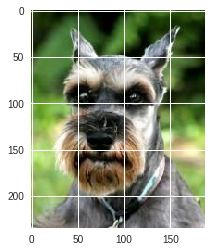

In [4]:
# Chargement des images
myTest = MyImages(CT_DIR_DATA, 2)
show_rgb_img(cv2.imread(myTest.lst_files[0], cv2.CV_32S));

In [16]:
%%time

from PIL import Image

CT_DIR_DATA_IMAGES = 'C:\Work\OpenClassrooms\data\P7\Images/'
images = []
lst_w = []
lst_h = []
lst_mode = []
for path, dirs, files in os.walk(CT_DIR_DATA):
    for filename in files:
        images.append(filename)
        img = Image.open(os.path.join(path, filename))
        w, h = img.size
        lst_w.append(w)
        lst_h.append(h)
        lst_mode.append(img.mode)
        img.close()

print(len(images), 'images')
print('w min =', np.min(lst_w))
print('h min =', np.min(lst_h))
print('w max =', np.max(lst_w))
print('h max =', np.max(lst_h))
print('w moy =', np.mean(lst_w))
print('h moy =', np.mean(lst_h))

lst_wh = []
for i in range(len(images)):
    lst_wh.append(lst_w[i]*lst_h[i])
print('size min =', np.min(lst_wh))
print('size max =', np.max(lst_wh))

print('mode =', set(lst_mode))


20580 images
w min = 97
h min = 100
w max = 3264
h max = 2562
w moy = 442.5318756073858
h moy = 385.8612244897959
size min = 10500
size max = 7990272
mode = {'RGB', 'RGBA'}
CPU times: user 2.18 s, sys: 436 ms, total: 2.62 s
Wall time: 2.62 s


## Utilisation du VGG-16 pré-entraîné

In [18]:
%%time
modelVGG16 = VGG16() # Création du modèle VGG-16 implementé par Keras

# Ici on peut voir toutes les couches du modèle
modelVGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
%%time
# On passe nos images au modèle
# X = preprocess_input(np.array(myTest.dataVgg))
# y_pred = modelVGG16.predict(X)
# print(decode_predictions(y_pred, top=1)[0][0][1])
# print(decode_predictions(y_pred, top=1)[1])
# print('Accuracy : %.2f' % accuracy_score(myTest.y_enc, y_pred))


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.6 µs


In [11]:
%%time

y_pred_lst = []
y_true_lst = []

for i in range(len(myTest.dataVgg)):
    img = myTest.dataVgg[i]
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    y = modelVGG16.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
    y_true_lib = myTest.races[myTest.labels[i]]
    y_true_lst.append(y_true_lib)

    # Afficher les 3 classes les plus probables
    y_pred = decode_predictions(y, top=1)[0]
    y_pred_lib = y_pred[0][1]
    y_pred_lst.append(y_pred_lib)

#   if y_pred_lib != y_true_lib:
#     print('TRUE :', myTest.races[myTest.labels[i]])
# #     print('TRUE code :', myTest.labels[i])
# #     print('PRED :', y_pred[0][1])
# #     print('PRED code :', y_pred[0][0])
#     print('PRED :', decode_predictions(y, top=3))

# #     img = cv2.imread(lst_files[i])
# #     print(lst_files[i])
# #     show_rgb_img(img);
# #   else:
# #     print('OK')

CPU times: user 7min 23s, sys: 1.16 s, total: 7min 24s
Wall time: 3min 57s


In [12]:
# y = model.predict(myTest.data)  # Prédire la classe de l'image (parmi les 1000 classes d'ImageNet)

TRUE : Japanese_spaniel
PRED : [[('n02086240', 'Shih-Tzu', 0.8725048), ('n02098413', 'Lhasa', 0.08040601), ('n02097474', 'Tibetan_terrier', 0.03364022)]]

TRUE : Japanese_spaniel
PRED : [[('n02102040', 'English_springer', 0.70512044), ('n02102318', 'cocker_spaniel', 0.104002096), ('n02111277', 'Newfoundland', 0.04744347)]]

TRUE : Japanese_spaniel
PRED : [[('n02086910', 'papillon', 0.84268755), ('n02085782', 'Japanese_spaniel', 0.15028957), ('n02105855', 'Shetland_sheepdog', 0.0012973363)]]

TRUE : Japanese_spaniel
PRED : [[('n02086646', 'Blenheim_spaniel', 0.93194836), ('n02085782', 'Japanese_spaniel', 0.035223626), ('n02102318', 'cocker_spaniel', 0.021934388)]]

TRUE : Japanese_spaniel
PRED : [[('n02090622', 'borzoi', 0.9783117), ('n02091244', 'Ibizan_hound', 0.010468382), ('n02091831', 'Saluki', 0.0016142258)]]

TRUE : Japanese_spaniel
PRED : [[('n02086910', 'papillon', 0.5628805), ('n02085782', 'Japanese_spaniel', 0.38094068), ('n02106030', 'collie', 0.016985608)]]

TRUE : Japanese_spaniel
PRED : [[('n02445715', 'skunk', 0.9330371), ('n02085782', 'Japanese_spaniel', 0.043169867), ('n02086910', 'papillon', 0.0060340585)]]

...

In [13]:
print('Accuracy : %.2f' % accuracy_score(y_true_lst, y_pred_lst))
print(y_pred_lst)

Accuracy : 0.62
['Chihuahua', 'Ibizan_hound', 'miniature_pinscher', 'toy_terrier', 'Chihuahua', 'Chihuahua', 'hog', 'Siamese_cat', 'miniature_pinscher', 'boxer', 'Chihuahua', 'Chihuahua', 'miniature_pinscher', 'Chihuahua', 'kelpie', 'Chihuahua', 'pajama', 'Chihuahua', 'Chihuahua', 'jinrikisha', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Italian_greyhound', 'Cardigan', 'Chihuahua', 'Mexican_hairless', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Pomeranian', 'Great_Dane', 'Chihuahua', 'Chihuahua', 'snorkel', 'miniature_pinscher', 'Mexican_hairless', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Italian_greyhound', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'kit_fox', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Lakeland_terrier', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Brittany_spaniel', 'Chihuahua', 'beagle', 'Siberian_husky', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'car_mirror', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'kelpie', 'wal

Avec 2 races de chiens on a une accuracy de 0.76

Et en regardant les mauvaises prédictions de plus près on voit que la prédiction en  second choix est souvent la bonne réponse, on peut donc espérer améliorer le modèle aisément

In [16]:
def testModel(mod, X, pp=False):
    ret = []
    y_pred_lst = []
    y_true_lst = []
    for i in range(len(X)):
        img = X[i]
        img = np.expand_dims(img, axis=0)
        if pp:
            img = preprocess_input(img)

        y = mod.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
        ret.append(y)
        y_true_lib = myTest.races[myTest.labels[i]]
        y_true_lst.append(y_true_lib)

        # Récup de la classes la plus probable
        y_pred = decode_predictions(y, top=1)[0]
        y_pred_lib = y_pred[0][1]
        y_pred_lst.append(y_pred_lib)
    acc = accuracy_score(y_true_lst, y_pred_lst)
    print('Accuracy : %.2f' % acc)
    return acc, ret

In [15]:
%%time
testModel(modelVGG16, myTest.dataVgg, True)
testModel(modelVGG16, myTest.dataVgg, False)


Accuracy : 0.57
Accuracy : 0.45
CPU times: user 14min 43s, sys: 2.61 s, total: 14min 45s
Wall time: 7min 52s


### Evolution avec le nombre de classes

In [0]:
%%time
myTest = MyImages(CT_DIR_DATA, 3)
testModel(modelVGG16, myTest.dataVgg, True)


2 races : ['Irish_terrier', 'borzoi']
320 images
40960/35363 [==================================] - 0s 1us/step
Accuracy : 0.83
3 races : ['Irish_terrier', 'borzoi', 'kelpie']
473 images
Accuracy : 0.80
4 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle']
624 images
Accuracy : 0.76
5 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher']
808 images
Accuracy : 0.72
6 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer']
967 images
Accuracy : 0.61
7 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois']
1117 images
Accuracy : 0.54
8 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel']
1302 images
Accuracy : 0.48
9 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua']
1454 imag

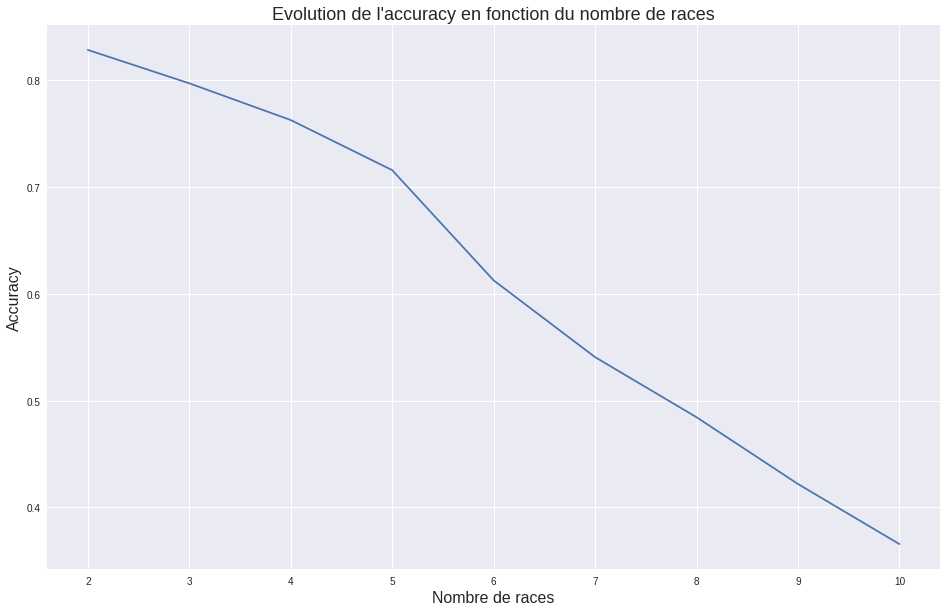

CPU times: user 59.9 s, sys: 15.6 s, total: 1min 15s
Wall time: 2min 1s


In [17]:
%%time
best_acc = []
r = range(2, 11)
for i in r:
    # Chargement des images
    mesImages = MyImages(CT_DIR_DATA, p_nb_races=i)
    acc, _ = testModel(modelVGG16, myTest.dataVgg, True)
    best_acc.append(acc)
    del mesImages

plt.figure(figsize=(16,10))
plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

11 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog']
1777 images
Accuracy : 0.33
12 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog', 'Brabancon_griffon']
1930 images
Accuracy : 0.27
13 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog', 'Brabancon_griffon', 'Airedale']
2132 images
Accuracy : 0.22
14 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog', 'Brabancon_griffon', 'Airedale', 'EntleBucher']
2334 images
Accuracy : 0.18
15 races : ['Irish_terrier', 'borzoi',

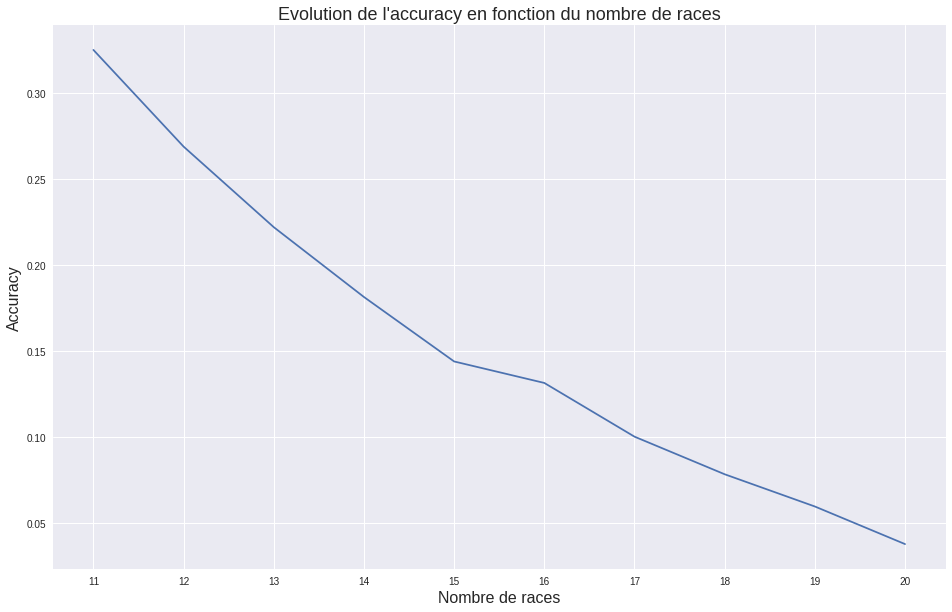

CPU times: user 2min 8s, sys: 17.5 s, total: 2min 25s
Wall time: 3min 17s


In [18]:
%%time
best_acc = []
r = range(11, 21)
for i in r:
    # Chargement des images
    mesImages = MyImages(CT_DIR_DATA, p_nb_races=i)
    acc, _ = testModel(modelVGG16, myTest.dataVgg, True)
    best_acc.append(acc)
    del mesImages

plt.figure(figsize=(16,10))
plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

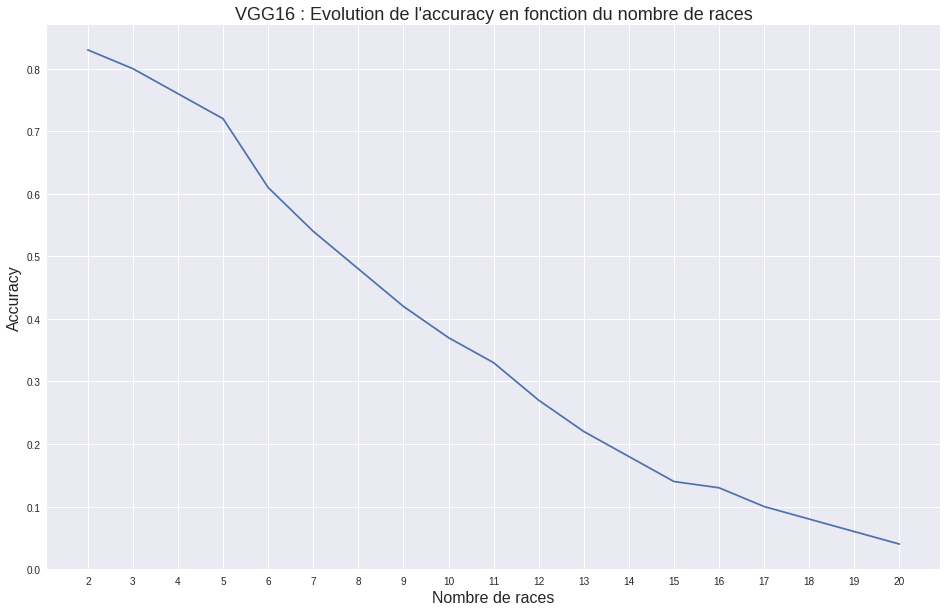

In [52]:
r = range(2, 21)
best_acc = [.83, .80, .76, 0.72, 0.61, 0.54, 0.48, 0.42, 0.37, 0.33, 0.27, .22, .18, .14, .13, .10, .08, .06, .04]

plt.figure(figsize=(16,10))
plt.title("VGG16 : Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()


## Transfer Learning

In [11]:
%%time
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# Récupérer la sortie de ce réseau
x = base_model.output
# Ajouter la nouvelle couche fully-connected pour la classification à n classes
n_classes = 2
predictions = Dense(n_classes, activation='softmax')(x)
# Définir le nouveau modèle
modelVGG16_new = Model(inputs=base_model.input, outputs=predictions)

# Stratégie #2 : extraction de features
# On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :
for layer in modelVGG16_new.layers:
    layer.trainable = False

modelVGG16_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
# Exemple de prédiction sur une image du jeu d'entrainement
# img = myTest.data[0]
# img_pp = np.expand_dims(img, axis=0)
# img_pp = preprocess_input(img_pp) 
# img_pp = myTest.dataVgg[0]

mesImages = MyImages(CT_DIR_DATA, 2)

X = preprocess_input(np.array(mesImages.dataVgg[1]))
   
y_pred = modelVGG16_new.predict(X)
print('Nb de features/image:%s' % y_pred.flatten().shape)


# img_pp = mesImages.dataVgg[1]
y_pred = base_model.predict(X)
print('Nb de features/image:%s' % y_pred.flatten().shape)

2 races : ['French_bulldog', 'Italian_greyhound']
341 images


AttributeError: ignored

### VGG16 sans la couche fully connected et avec un SVC



On enlève les couches fully connected et on entraine manuellement le résultat du VGG16

In [19]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Ici on peut voir toutes les couches du modèle
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [20]:
%%time
myTest = MyImages(CT_DIR_DATA, 4)

print('Dimensions en entrée :', np.array(myTest.dataVgg).shape)
X = preprocess_input(np.array(myTest.dataVgg))
Xvgg = base_model.predict(X)
print('Dimensions en sortie :', Xvgg.shape)
Xvgg_reshape = Xvgg.reshape(Xvgg.shape[0], -1)
print('Dimensions après reshape :', Xvgg_reshape.shape)

X_scaled = StandardScaler().fit_transform(Xvgg_reshape)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, myTest.y_enc, stratify=myTest.y_enc, test_size=0.25, random_state=10)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVC - accuracy score sur le jeu X_train: %.2f' % accuracy_score(y_train, svc.predict(X_train)))
print('SVC - accuracy score sur le jeu X_test: %.2f' % accuracy_score(y_test, y_pred))

4 races : ['French_bulldog', 'Italian_greyhound', 'Chesapeake_Bay_retriever', 'Cardigan']
663 images
Dimensions en entrée : (663, 224, 224, 3)
Dimensions en sortie : (663, 7, 7, 512)
Dimensions après reshape : (663, 25088)
SVC - accuracy score sur le jeu X_train: 1.00
SVC - accuracy score sur le jeu X_test: 0.78
CPU times: user 31.8 s, sys: 5.99 s, total: 37.8 s
Wall time: 37 s


In [0]:
datagen = ImageDataGenerator(
    rescale=1./255
    rotation_range=5,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = datagen.flow(X_train, y_train, batch_size=20)
test_generator = datagen.flow(X_test, y_test, batch_size=20)

In [11]:
# from google.colab import files
# files.download('result.csv')
import pickle
def save_obj(obj, name):
    fn = name + '.pkl'
    try:
        os.remove(fn)
    except OSError:
        pass
    with open(fn, 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    print(fn, 'saved')
save_obj(svc, 'svc')
base_model.save('base_model.h5')

svc.pkl saved


In [4]:
%%time
myTest = MyImages(CT_DIR_DATA, 30)

print('Dimensions en entrée :', np.array(myTest.dataVgg).shape)
X = preprocess_input(np.array(myTest.dataVgg))
Xvgg = base_model.predict(X)
print('Dimensions en sortie :', Xvgg.shape)
Xvgg_reshape = Xvgg.reshape(Xvgg.shape[0], -1)
print('Dimensions après reshape :', Xvgg_reshape.shape)

X = StandardScaler().fit_transform(Xvgg_reshape)
X_train, X_test, y_train, y_test = train_test_split(X, myTest.y_enc, stratify=myTest.y_enc, test_size=0.25, random_state=10)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVC - accuracy score sur le jeu X_train: %.2f' % accuracy_score(y_train, svc.predict(X_train)))
print('SVC - accuracy score sur le jeu X_test: %.2f' % accuracy_score(y_test, y_pred))

30 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier', 'Norwich_terrier', 'pug', 'Bouvier_des_Flandres', 'schipperke', 'Dandie_Dinmont', 'bull_mastiff', 'Irish_water_spaniel', 'Kerry_blue_terrier', 'Maltese_dog', 'otterhound', 'bloodhound', 'Samoyed', 'wire-haired_fox_terrier', 'Bernese_mountain_dog', 'Boston_bull', 'kelpie', 'basset', 'Mexican_hairless', 'Staffordshire_bullterrier', 'Shih-Tzu', 'Sussex_spaniel', 'Weimaraner', 'Chihuahua']
5246 images
Dimensions en entrée : (5246, 224, 224, 3)
Dimensions en sortie : (5246, 7, 7, 512)
Dimensions après reshape : (5246, 25088)
SVC - accuracy score sur le jeu X_train: 1.00
SVC - accuracy score sur le jeu X_test: 0.73
CPU times: user 33min 43s, sys: 40.6 s, total: 34min 23s
Wall time: 34min 18s


#### Evolution avec le nombre de classes

2 races : ['Rhodesian_ridgeback', 'Shih-Tzu']
386 images
386 labels
Accuracy = 1.00
3 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound']
625 images
625 labels
Accuracy = 0.96
4 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound', 'Maltese_dog']
877 images
877 labels
Accuracy = 0.86
5 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound', 'Maltese_dog', 'Blenheim_spaniel']
1065 images
1065 labels
Accuracy = 0.91
6 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound', 'Maltese_dog', 'Blenheim_spaniel', 'Chihuahua']
1217 images
1217 labels
Accuracy = 0.89
7 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound', 'Maltese_dog', 'Blenheim_spaniel', 'Chihuahua', 'toy_terrier']
1389 images
1389 labels
Accuracy = 0.86
8 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound', 'Maltese_dog', 'Blenheim_spaniel', 'Chihuahua', 'toy_terrier', 'Japanese_spaniel']
1574 images
1574 labels
Accuracy = 0.83
9 races : ['Rhodesian_ridgeback', 'Shih-Tzu', 'Afghan_hound', 'M

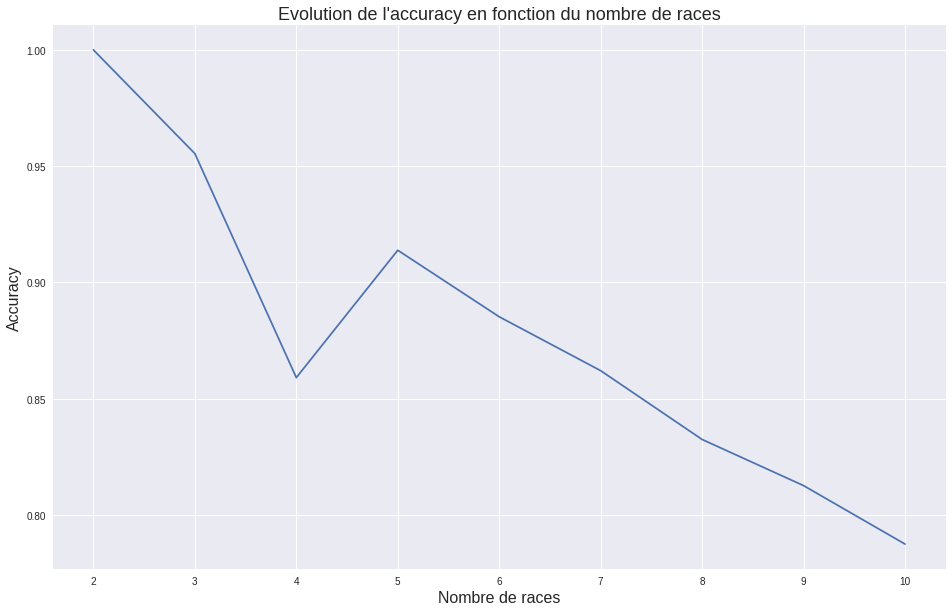

CPU times: user 10min 55s, sys: 1min 17s, total: 12min 13s
Wall time: 12min 2s


In [7]:
%%time
best_acc = []
r = range(2, 11)
for i in r:
    # Chargement des images
    mesImages = MyImages(CT_DIR_DATA, p_nb_races=i)
    # Préparation
    X = preprocess_input(np.array(mesImages.dataVgg))
    Xvgg = base_model.predict(X)
    Xvgg_reshape = Xvgg.reshape(Xvgg.shape[0], -1)
    X = StandardScaler().fit_transform(Xvgg_reshape)
    X_train, X_test, y_train, y_test = train_test_split(X, mesImages.y_enc, stratify=mesImages.y_enc, test_size=0.25, random_state=10)
    # Entrainement
    svc = SVC()
    svc.fit(X_train, y_train)
    # Récupération du meilleur score
    acc = accuracy_score(y_test, svc.predict(X_test))
    best_acc.append(acc)
    print('Accuracy = %.2f' % (acc))
    del mesImages

plt.figure(figsize=(16,10))
plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

14 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog', 'Brabancon_griffon', 'Airedale', 'EntleBucher']
2334 images
Accuracy = 0.76
15 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog', 'Brabancon_griffon', 'Airedale', 'EntleBucher', 'Bernese_mountain_dog']
2552 images
Accuracy = 0.76
16 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'schipperke', 'African_hunting_dog', 'Brabancon_griffon', 'Airedale', 'EntleBucher', 'Bernese_mountain_dog', 'cairn']
2749 images
Accuracy = 0.79
17 races : ['Irish_terrier', 'borzoi', 'kelpie', 'toy_poodle', 'miniature_pinscher', 'English_springer', 'malinois', 'Japanese_spaniel', 'Chihuahua', 'sch

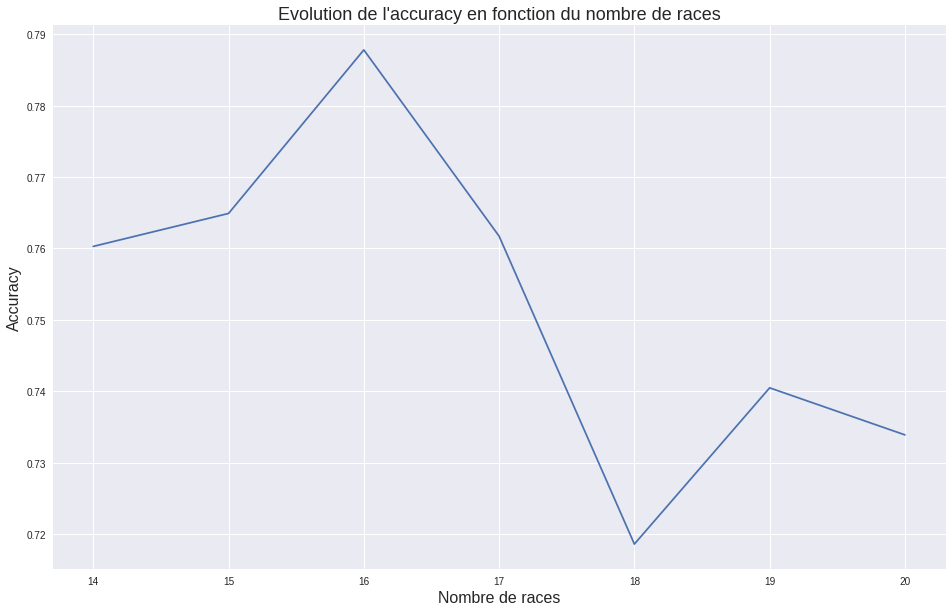

CPU times: user 49min 10s, sys: 2min 8s, total: 51min 18s
Wall time: 50min 53s


In [9]:
%%time
best_acc = []
r = range(14, 21)
for i in r:
    # Chargement des images
    mesImages = MyImages(CT_DIR_DATA, p_nb_races=i)
    # Préparation
    X = preprocess_input(np.array(mesImages.dataVgg))
    Xvgg = base_model.predict(X)
    Xvgg_reshape = Xvgg.reshape(Xvgg.shape[0], -1)
    X = StandardScaler().fit_transform(Xvgg_reshape)
    X_train, X_test, y_train, y_test = train_test_split(X, mesImages.y_enc, stratify=mesImages.y_enc, test_size=0.25, random_state=10)
    # Entrainement
    svc = SVC()
    svc.fit(X_train, y_train)
    # Récupération du meilleur score
    acc = accuracy_score(y_test, svc.predict(X_test))
    best_acc.append(acc)
    print('Accuracy = %.2f' % (acc))
    del mesImages

plt.figure(figsize=(16,10))
plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

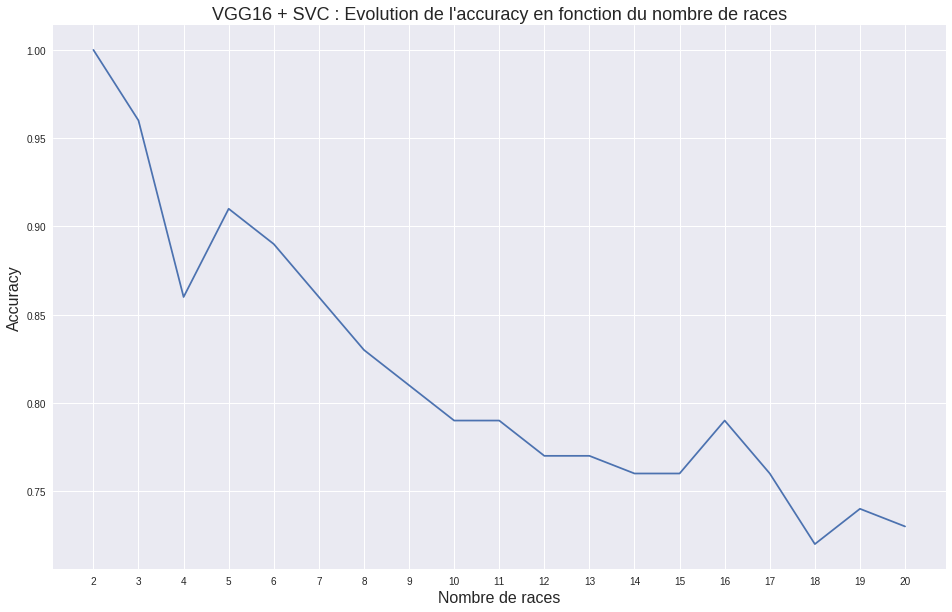

In [18]:
r = range(2, 21)
best_acc = [1.00, 0.96, 0.86, 0.91, 0.89, 0.86, 0.83, 0.81, 0.79, .79, .77, .77, .76, .76, .79, .76, .72, .74, .73]

plt.figure(figsize=(16,10))
plt.title("VGG16 + SVC : Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

In [0]:
from keras import optimizers
optimizers.

### Fine tuning partiel

On garde les couches de convolution et on remplace l'optimiseur qu'on va adapter à notre problème.

Les paramètres par défaut du SGD donne une accuracy de 0.54, on va devoir tester différents paramétrages

In [7]:
%%time
from sklearn import preprocessing
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras import optimizers

# Chargement des images
nb_classes = 10
mesImages = MyImages(CT_DIR_DATA, p_nb_races=nb_classes)
X = preprocess_input(np.array(mesImages.dataVgg))
# X = preprocessing.StandardScaler().fit_transform(X)
y = mesImages.y_enc
y = preprocessing.OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

10 races : ['French_bulldog', 'Italian_greyhound', 'Chesapeake_Bay_retriever', 'Cardigan', 'Bouvier_des_Flandres', 'schipperke', 'groenendael', 'briard', 'African_hunting_dog', 'Irish_setter']
1593 images
CPU times: user 7.75 s, sys: 2.21 s, total: 9.96 s
Wall time: 9.97 s


In [21]:
%%time
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# Récupérer la sortie de ce réseau
x = model.output
# Flattening
x = Flatten()(x) 
# Ajouter la nouvelle couche fully-connected pour la classification à n classes
activ_mode = 'softmax'
# activ_mode = 'sigmoid'
predictions = Dense(nb_classes, activation=activ_mode)(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

# Stratégie #2 : extraction de features
# On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :
for layer in model.layers:
    layer.trainable = False

# Définir le modèle 
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.0, nesterov=False, clipnorm=1., clipvalue=0.5) # acc=0.76 (avec epoch=10, batch size=50)
# plutôt pareil avec nesterov=true
# plutôt pareil avec clipnorm=1
# avec momentum=0.9 c'est mieux (0.71)
# Mieux si lr diminue à 1e-4 (0.82)
sgd = optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=True, clipnorm=1.) # acc=0.76 (avec epoch=10, batch size=50)
# sgd = optimizers.SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True, clipvalue=0.5) # acc = 0.20
# sgd = optimizers.SGD() # acc = 0.36

# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
# epoch = nombre de passe pour toutes les images
# batch_size = nombre d'image par passe (forward et backward)
model_info = new_model.fit(X_train, y_train, epochs=5, batch_size=20, verbose=2) #acc=0.70 / 0.20
# Mieux si epoch passe de 5 à 10 ou 20 mais bien sur plus long : acc=0.60 / 0.76 / 0.77, on peut dire que c'est optimal à 10
# Attention à la mémoire si batch_size est trop grand, 20 donne de bons résultats

# Score
score = new_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
 - 16s - loss: 8.7199 - acc: 0.4213
Epoch 2/10
 - 16s - loss: 5.3651 - acc: 0.6466
Epoch 3/10
 - 16s - loss: 4.5764 - acc: 0.7035
Epoch 4/10
 - 15s - loss: 4.0720 - acc: 0.7404
Epoch 5/10
 - 15s - loss: 3.9896 - acc: 0.7487
Epoch 6/10
 - 15s - loss: 3.7947 - acc: 0.7588
Epoch 7/10
 - 15s - loss: 3.9991 - acc: 0.7479
Epoch 8/10
 - 16s - loss: 3.7115 - acc: 0.7663
Epoch 9/10
 - 15s - loss: 3.7391 - acc: 0.7647
Epoch 10/10
 - 15s - loss: 3.6917 - acc: 0.7663
399/399 [==============================] - 4s 10ms/step
Test loss: 4.085351217360723
Test accuracy: 0.741854637189019
CPU times: user 29.7 s, sys: 12.9 s, total: 42.6 s
Wall time: 2min 43s


#### Evolution avec le nombre de classes

2 races : ['standard_schnauzer', 'Brittany_spaniel']
307 images
Accuracy = 0.97
3 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole']
457 images
Accuracy = 0.99
4 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke']
638 images
Accuracy = 0.96
5 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji']
847 images
Accuracy = 0.91
6 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound']
1006 images
Accuracy = 0.91
7 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier']
1212 images
Accuracy = 0.91
8 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier', 'Norwich_terrier']
1397 images
Accuracy = 0.79
9 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier', 'Norwich_t

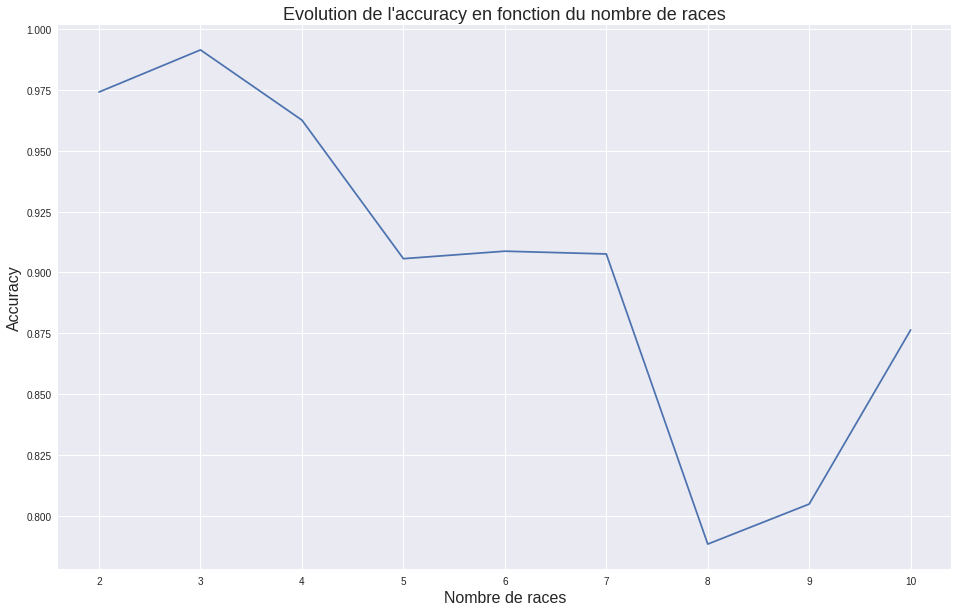

CPU times: user 2min 19s, sys: 1min 6s, total: 3min 26s
Wall time: 8min 34s


In [7]:
%%time
best_acc = []
r = range(2, 11)
for nb_classes in r:
    model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    x = model.output
    x = Flatten()(x) 
    # Ajouter la nouvelle couche fully-connected pour la classification à n classes
    predictions = Dense(nb_classes, activation='softmax')(x)

    new_model = Model(inputs=model.input, outputs=predictions)
    for layer in model.layers:
        layer.trainable = False

    mesImages = MyImages(CT_DIR_DATA, p_nb_races=nb_classes)
    X = preprocess_input(np.array(mesImages.dataVgg))

    y = mesImages.y_enc
    y = preprocessing.OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

    new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
    model_info = new_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=0)

    # Récupération du meilleur score
    score = new_model.evaluate(X_test, y_test, verbose=0)
    best_acc.append(score[1])
    print('Accuracy = %.2f' % (score[1]))
    del mesImages

plt.figure(figsize=(16,10))
plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

In [0]:
%%time
best_acc = []
r = range(18, 21)
for nb_classes in r:
    model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    x = model.output
    x = Flatten()(x) 
    # Ajouter la nouvelle couche fully-connected pour la classification à n classes
    predictions = Dense(nb_classes, activation='softmax')(x)

    new_model = Model(inputs=model.input, outputs=predictions)
    for layer in model.layers:
        layer.trainable = False

    mesImages = MyImages(CT_DIR_DATA, p_nb_races=nb_classes)
    X = preprocess_input(np.array(mesImages.dataVgg))

    y = mesImages.y_enc
    y = preprocessing.OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

    new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
    model_info = new_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=0)

    # Récupération du meilleur score
    score = new_model.evaluate(X_test, y_test, verbose=0)
    best_acc.append(score[1])
    print('Accuracy = %.2f' % (score[1]))
    del mesImages

plt.figure(figsize=(16,10))
plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, best_acc)
plt.show()

18 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier', 'Norwich_terrier', 'pug', 'Bouvier_des_Flandres', 'schipperke', 'Dandie_Dinmont', 'bull_mastiff', 'Irish_water_spaniel', 'Kerry_blue_terrier', 'Maltese_dog', 'otterhound', 'bloodhound']
3156 images
Accuracy = 0.65
19 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier', 'Norwich_terrier', 'pug', 'Bouvier_des_Flandres', 'schipperke', 'Dandie_Dinmont', 'bull_mastiff', 'Irish_water_spaniel', 'Kerry_blue_terrier', 'Maltese_dog', 'otterhound', 'bloodhound', 'Samoyed']
3374 images
Accuracy = 0.65
20 races : ['standard_schnauzer', 'Brittany_spaniel', 'dhole', 'Pembroke', 'basenji', 'black-and-tan_coonhound', 'Tibetan_terrier', 'Norwich_terrier', 'pug', 'Bouvier_des_Flandres', 'schipperke', 'Dandie_Dinmont', 'bull_mastiff', 'Irish_water_spaniel', 'Kerry_blue_terrier', 'Maltese_dog', 'otterh

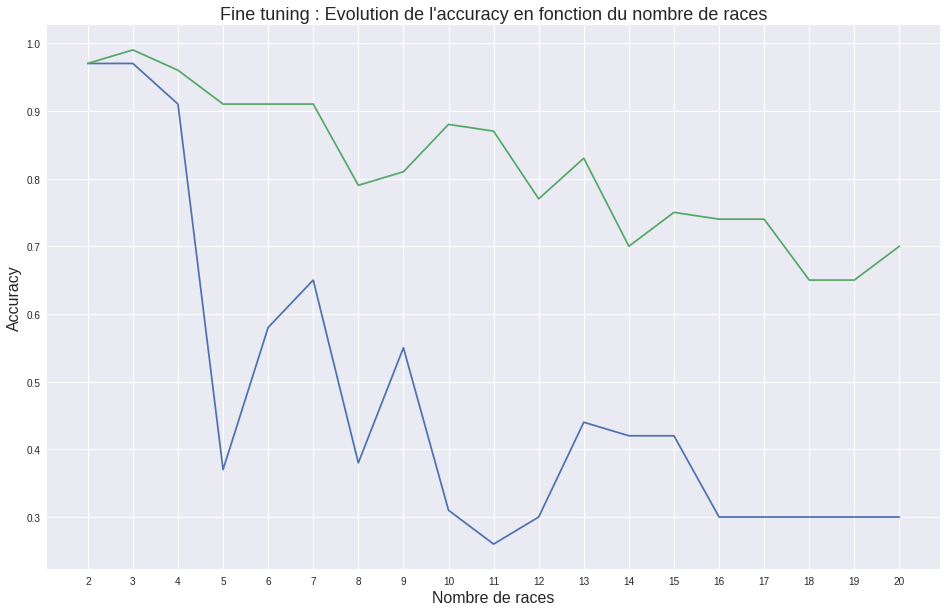

In [20]:
r = range(2, 21)
acc_tl_bs10 = [.97, 0.97, 0.91, 0.37, 0.58, 0.65, 0.38, 0.55, 0.31, .26, .30, .44, .42, .42, .30, .30, .30, .30, .30]
acc_tl_bs100 = [.97, 0.99, 0.96, 0.91, 0.91, 0.91, 0.79, 0.81, 0.88, .87, .77, .83, .70, .75, .74, .74, .65, .65, .70]

plt.figure(figsize=(16,10))
plt.title("Fine tuning : Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
plt.xlabel('Nombre de races', fontsize=16)
plt.xticks(r)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(r, acc_tl_bs10, label='Batch_size = 10')
plt.plot(r, acc_tl_bs100, label='Batch_size = 100')
plt.show()

#### Traitement des données avec ImageDataGenerator

In [21]:
nb_classes = 10
# Chargement des images
mesImages = MyImages(CT_DIR_DATA, p_nb_races=nb_classes)

10 races : ['French_bulldog', 'Italian_greyhound', 'Chesapeake_Bay_retriever', 'Cardigan', 'Bouvier_des_Flandres', 'schipperke', 'groenendael', 'briard', 'African_hunting_dog', 'Irish_setter']
1593 images


In [24]:
%%time
from keras.preprocessing.image import ImageDataGenerator

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# Récupérer la sortie de ce réseau
x = model.output
# Flattening
x = Flatten()(x) 
# Ajouter la nouvelle couche fully-connected pour la classification à n classes
predictions = Dense(nb_classes, activation='softmax')(x)
# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)
# On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :
for layer in model.layers:
    layer.trainable = False

X = preprocess_input(np.array(mesImages.dataVgg))
# X = preprocessing.StandardScaler().fit_transform(X)
y = mesImages.y_enc
y = preprocessing.OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

train_datagen = ImageDataGenerator(
    rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2, # acc=0.63 -> 0.54
    zca_whitening=True,
#     featurewise_center=True,
    featurewise_std_normalization=True,
#     horizontal_flip=True
#     rescale=1./255 # -> 0.77
)
train_generator = train_datagen.flow(X_train, y_train, batch_size=20)
test_datagen = ImageDataGenerator(
    rotation_range=20,
    zca_whitening=True,
#     featurewise_center=True,
    featurewise_std_normalization=True,
#     horizontal_flip=True
#     rescale=1./255 # -> 0.77
#     rescale=0
            )
test_generator = test_datagen.flow(X_test, y_test, batch_size=20)

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=5,
#     zoom_range=0.2,
#     horizontal_flip=True)
# train_generator = datagen.flow(X_train, y_train, batch_size=20)
# test_generator = datagen.flow(X_test, y_test, batch_size=20)

new_model.fit_generator(train_generator, epochs=5, validation_data=test_generator)

score = new_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:645: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:650: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:657: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:817: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


60/60 [==============================] - 28s 471ms/step - loss: 7.7071 - acc: 0.4821 - val_loss: 5.2701 - val_acc: 0.6541
Epoch 2/5
60/60 [==============================] - 25s 424ms/step - loss: 4.9639 - acc: 0.6754 - val_loss: 5.1440 - val_acc: 0.6742
Epoch 3/5
60/60 [==============================] - 26s 427ms/step - loss: 4.5882 - acc: 0.6986 - val_loss: 5.0802 - val_acc: 0.6742
Epoch 4/5
60/60 [==============================] - 26s 425ms/step - loss: 4.0675 - acc: 0.7401 - val_loss: 4.3331 - val_acc: 0.7118
Epoch 5/5
53/60 [=========================>....] - ETA: 2s - loss: 3.9063 - acc: 0.7487

399/399 [==============================] - 4s 10ms/step
Test loss: 4.140796571745908
Test accuracy: 0.7293233087188319
CPU times: user 2min 53s, sys: 9.59 s, total: 3min 3s
Wall time: 2min 18s


### Fine tuning avec nouvelle couche

In [0]:
from sklearn import preprocessing
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras import optimizers


In [7]:
%%time
# Chargement des images
nb_classes = 10
mesImages = MyImages(CT_DIR_DATA, p_nb_races=nb_classes)
X = preprocess_input(np.array(mesImages.dataVgg))
y = mesImages.y_enc
y = preprocessing.OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)


10 races : ['French_bulldog', 'Italian_greyhound', 'Chesapeake_Bay_retriever', 'Cardigan', 'Bouvier_des_Flandres', 'schipperke', 'groenendael', 'briard', 'African_hunting_dog', 'Irish_setter']
1593 images


In [17]:
%%time
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
x = model.output
x = Flatten()(x) 

# Ajout d'une couche fully-connected avec activation ReLU
x = Dense(4096, activation='relu')(x) # acc 0.67 -> 0.71
# x = Dropout(0.5)(x) #0.59
#x = Dense(4096, activation='relu')(x)

predictions = Dense(nb_classes, activation='softmax')(x)
# predictions = Dense(nb_classes, activation='sigmoid')(x)

for layer in model.layers[:len(model.layers)-1]:
    layer.trainable = False

new_model = Model(inputs=model.input, outputs=predictions)

# Définir le modèle 
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.0, nesterov=False, clipnorm=1.)
# Params par défaut : acc=0.76
# sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)

# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model.fit(X_train, y_train, epochs=5, batch_size=20, verbose=0)

score = new_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', score[1])


ResourceExhaustedError: ignored

In [6]:
%%time
best_acc = []
r = range(10, 11)
for nb_classes in r:
    model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    x = model.output
    x = Flatten()(x) 

    # Ajout d'une couche fully-connected avec activation ReLU
    x = Dense(4096, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     x = Dense(4096, activation='relu')(x)
    predictions = Dense(nb_classes, activation='softmax')(x)

    new_model = Model(inputs=model.input, outputs=predictions)
    for layer in model.layers:
        layer.trainable = False

    mesImages = MyImages(CT_DIR_DATA, p_nb_races=nb_classes)
    X = preprocess_input(np.array(mesImages.dataVgg))
    y = mesImages.y_enc
    y = preprocessing.OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

    # Définir le modèle 
#     sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.0, nesterov=False, clipnorm=1.)
    # Params par défaut : acc=0.76
    sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
    
    # Compiler le modèle 
    new_model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    # Entraîner sur les données d'entraînement (X_train, y_train)
    model_info = new_model.fit(X_train, y_train, epochs=5, batch_size=20, verbose=0)

    score = new_model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy:', score[1])
    best_acc.append(score[1])
    del mesImages

    
# plt.figure(figsize=(16,10))
# plt.title("Evolution de l'accuracy en fonction du nombre de races", fontsize=18)
# plt.xlabel('Nombre de races', fontsize=16)
# plt.xticks(r)
# plt.ylabel('Accuracy', fontsize=16)
# plt.plot(r, best_acc)
# plt.show()

10 races : ['French_bulldog', 'Italian_greyhound', 'Chesapeake_Bay_retriever', 'Cardigan', 'Bouvier_des_Flandres', 'schipperke', 'groenendael', 'briard', 'African_hunting_dog', 'Irish_setter']
1593 images
Accuracy: 0.18045112808097274
CPU times: user 27.2 s, sys: 19.4 s, total: 46.5 s
Wall time: 1min 54s


In [10]:
best_acc

[0.8255814022796099,
 0.7952755924284928,
 0.7108433742121042,
 0.7205882352941176,
 0.6652892557057467,
 0.6428571445601327,
 0.5880503144654088]

# Sauvegarde

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

uploaded = drive.CreateFile({'title': 'best_model.sav'})
uploaded.SetContentFile('best_model.h5')
uploaded.Upload()